In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt, loadtxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Turbulência</center>
* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.3.c"

A = loadtxt("noise_equals_1_67.txt")
    
savetxt(name + ".txt", A)

save_A = A

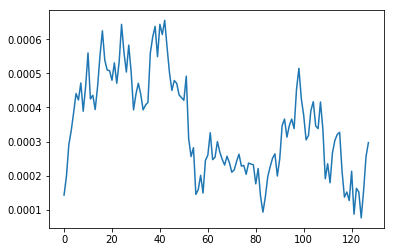

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.000244136962891
var  :  1.3199607963e-07
skew :  -0.352073944946
kurt :  0.42935810211
Q1   :  2.575e-05
Q3   :  0.00047525


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

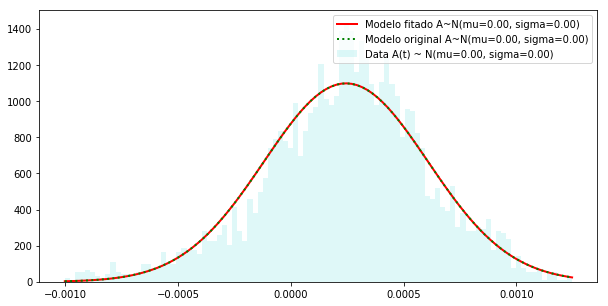

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

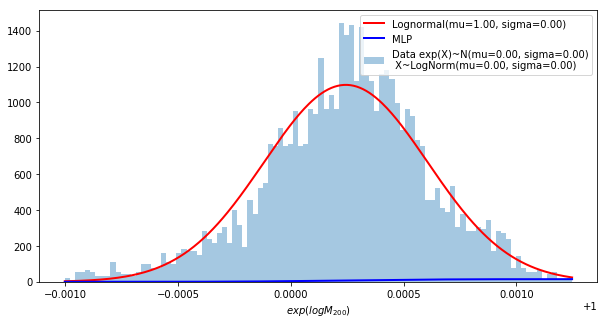

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.1684247027425318, -0.002067729901793775, 0.0022809004857261977)
        Fitado			 Original
mean :  0.00024575211256293045 	 0.000244136962891
var  :  1.5399910080257096e-07 	 1.3199607963e-07
skew :  0.5137593012465203 	 -0.35207394494638344
kurt :  0.4729307697920442 	 0.42935810210956493


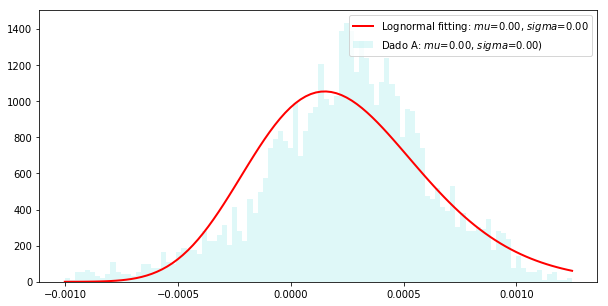

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.001003   max:  0.001247 
median:  0.0002625 
mean:  0.000244137 
estimated sd:  0.000363357 
estimated skewness:  -0.3522029 
estimated kurtosis:  3.431349 



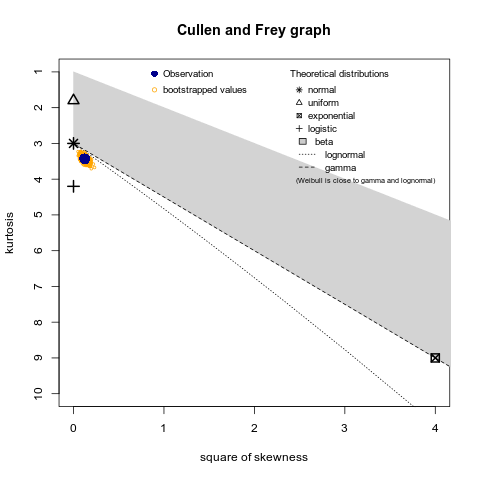

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (5.3314803021402195, 4.3972427035224344, -0.001103, 0.0024500000000000004)
        Fitado			 Original
mean :  0.00023963528035906233 	 0.000244136962891
var  :  1.3858004722743925e-07 	 1.3199607963e-07
skew :  -0.10776965707253301 	 -0.35207394494638344
kurt :  -0.4553220817093983 	 0.42935810210956493


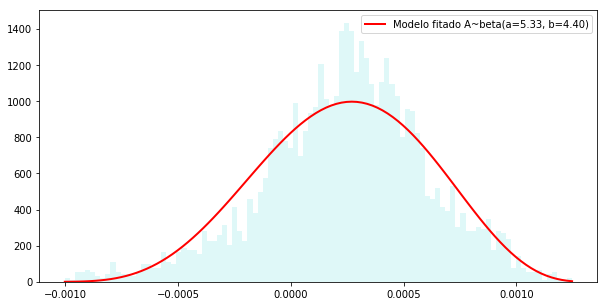

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

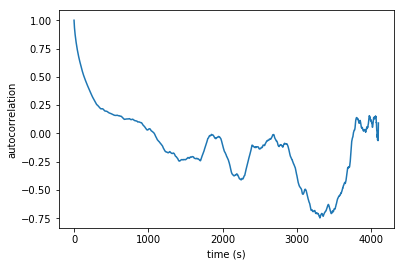

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [ 0.000143  0.000198  0.000291  0.000332  0.000385  0.000441  0.000422
  0.000472  0.000389  0.000461]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


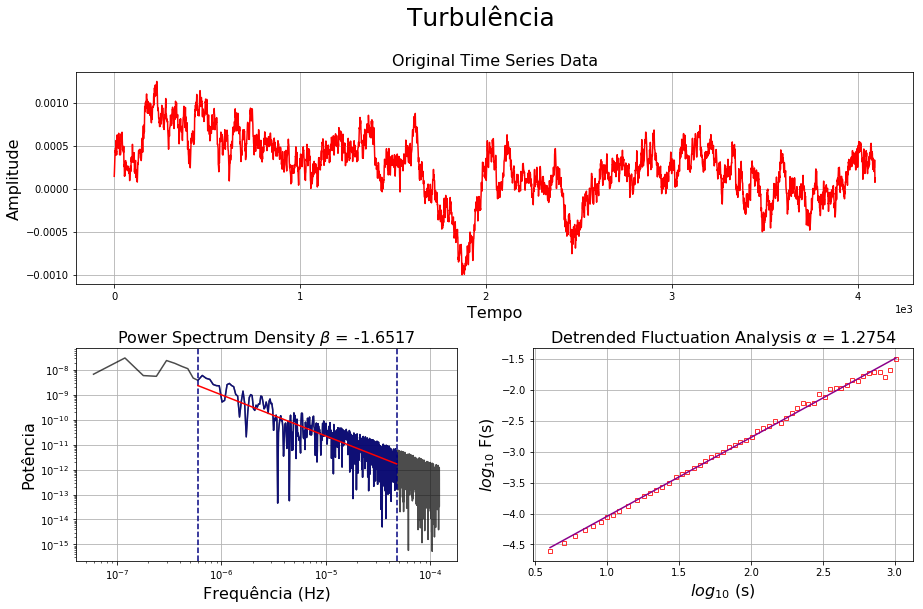

In [11]:
aux.plot_psd_dfa(A, 'Turbulência')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.3.c"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.000127077148437
var  :  1.00571332915e-07
skew :  -0.702454863501
kurt :  0.619430692274
Q1   :  -5e-05
Q3   :  0.000346


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

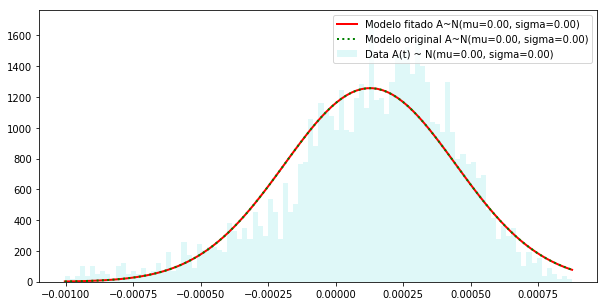

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

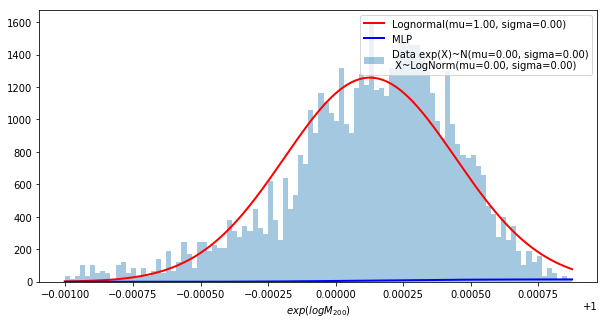

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.16270669887174818, -0.0020079926443614502, 0.0021087125907060279)
        Fitado			 Original
mean :  0.00012881796873005693 	 0.000127077148437
var  :  1.2249102107191445e-07 	 1.00571332915e-07
skew :  0.49576252538649906 	 -0.7024548635007172
kurt :  0.4401437639517196 	 0.6194306922739092


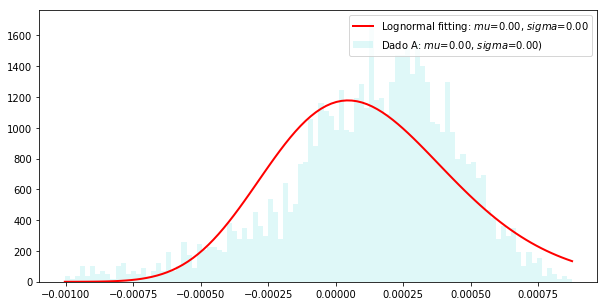

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.001003   max:  0.000875 
median:  0.0001635 
mean:  0.0001270771 
estimated sd:  0.0003171815 
estimated skewness:  -0.7027981 
estimated kurtosis:  3.622396 



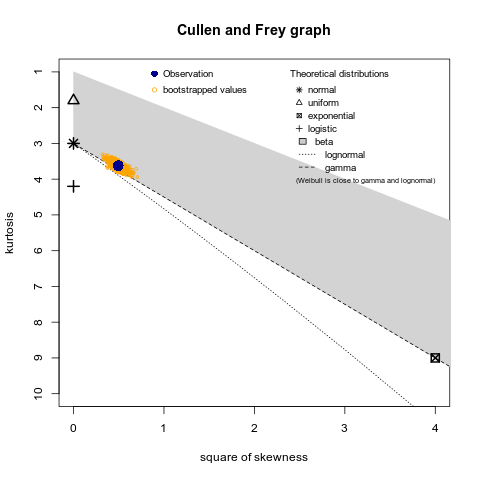

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (5.406530912226378, 3.7860328798645693, -0.001103, 0.002078)
        Fitado			 Original
mean :  0.00011915863710105883 	 0.000127077148437
var  :  1.0262127713803663e-07 	 1.00571332915e-07
skew :  -0.20433328103302115 	 -0.7024548635007172
kurt :  -0.4346116779535383 	 0.6194306922739092


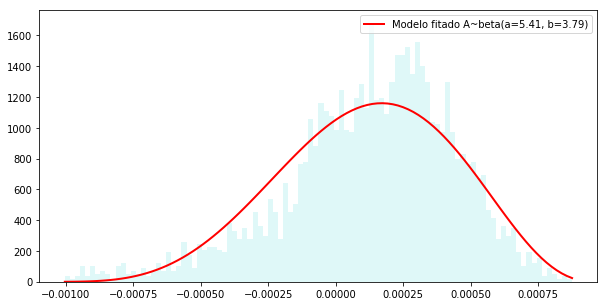

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

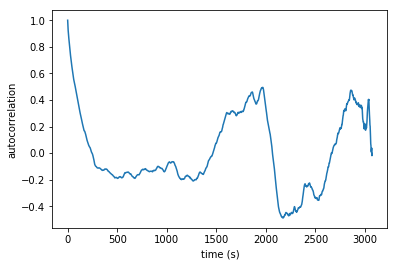

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [  1.95000000e-04   1.72000000e-04   1.46000000e-04   1.11000000e-04
   1.26000000e-04   9.50000000e-05   1.77000000e-04   1.90000000e-04
   2.87000000e-04   3.41000000e-04]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


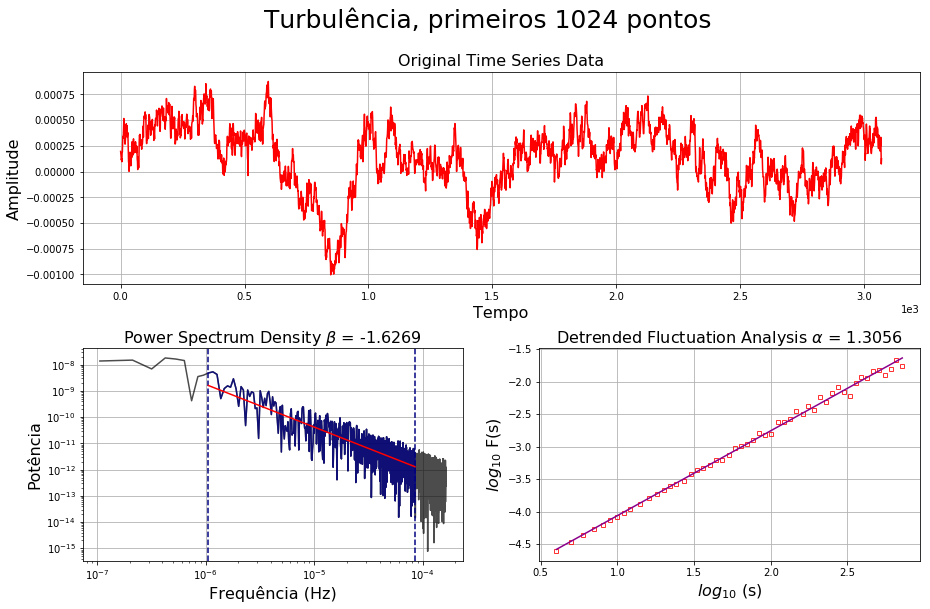

In [20]:
aux.plot_psd_dfa(A, 'Turbulência, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.3.c"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.00011609375
var  :  6.37344697266e-08
skew :  -0.0478410720291
kurt :  -0.771149471011
Q1   :  -7.225e-05
Q3   :  0.00031825


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

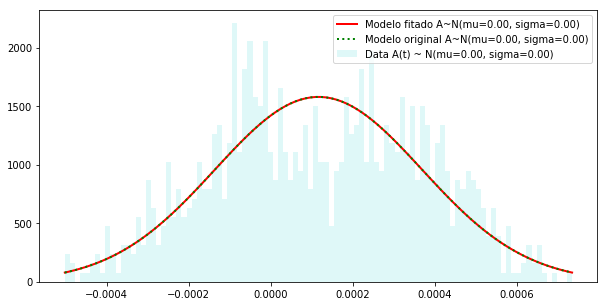

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

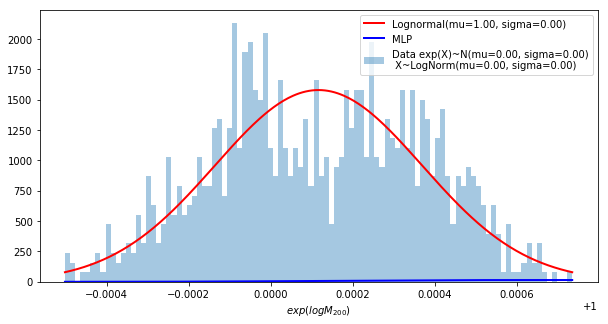

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.22860915602339449, -0.0010473623536452269, 0.0011346407050944821)
        Fitado			 Original
mean :  0.00011731851213566693 	 0.00011609375
var  :  7.277783411656646e-08 	 6.37344697266e-08
skew :  0.7073138359009346 	 -0.04784107202911915
kurt :  0.9025435153637078 	 -0.7711494710107498


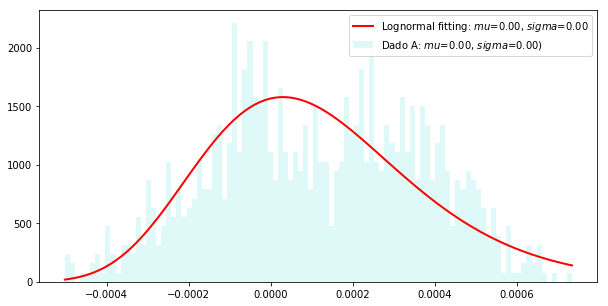

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.000502   max:  0.000734 
median:  0.000111 
mean:  0.0001160937 
estimated sd:  0.0002525802 
estimated skewness:  -0.04791128 
estimated kurtosis:  2.230954 



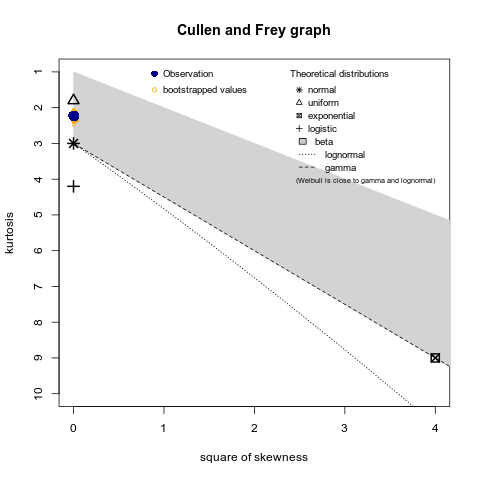

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (3.6059826185689086, 3.615293426803603, -0.000602, 0.001436)
        Fitado			 Original
mean :  0.00011507424113542993 	 0.00011609375
var  :  6.270597655709369e-08 	 6.37344697266e-08
skew :  0.0016036603060277039 	 -0.04784107202911915
kurt :  -0.5870073757393641 	 -0.7711494710107498


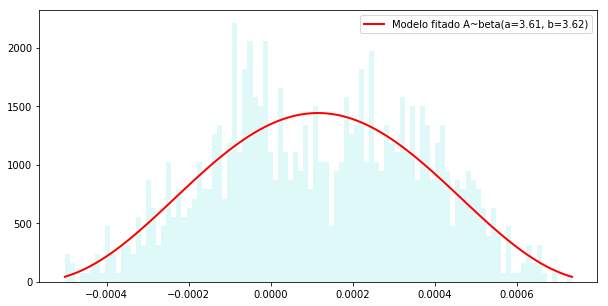

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

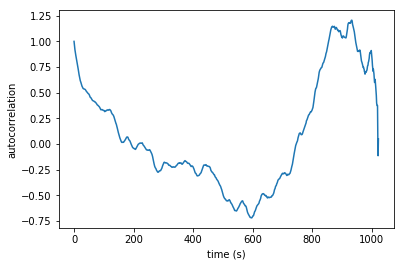

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ 0.00051   0.000409  0.000346  0.000406  0.000513  0.000442  0.000438
  0.000446  0.000375  0.000375]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


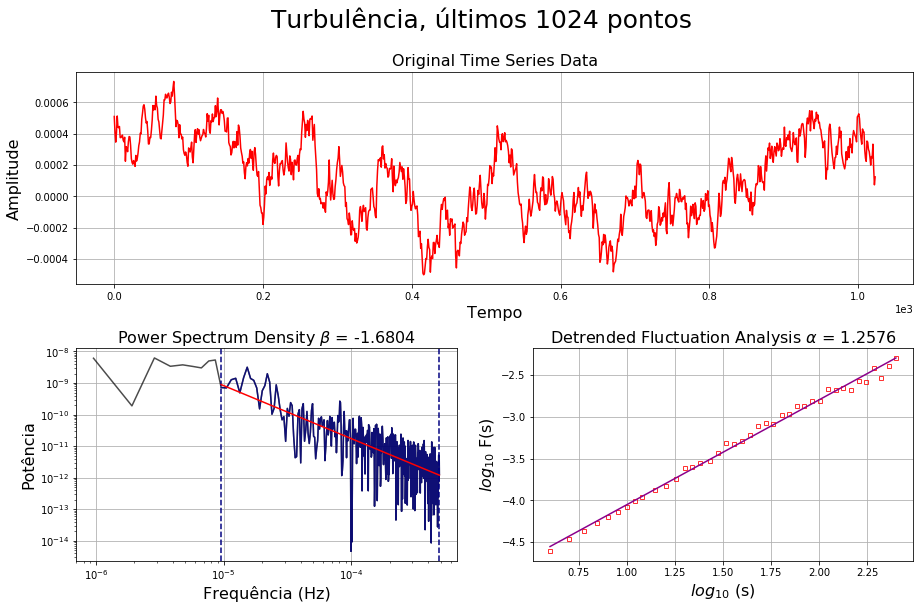

In [30]:
aux.plot_psd_dfa(A, 'Turbulência, últimos 1024 pontos')